# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [42]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [43]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [44]:
# your code and output here
df[ (df["age"] >= 14) & (df["age"] <= 50) ].age.mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [45]:
# your code and output here
len(df[ (df["age"] >= 16) & (df["age"] <= 26) ]) / df.shape[0]

0.22603413544871095

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [46]:
# your code and output here
len(df[ (df["age"]==28) | (df["age"]==30) ])

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [47]:
# your code and output here
df[ (df["age"] >= 18) & (df["age"] <= 30) ].age.describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [48]:
# your code and output here
print("Положительных: " + str(len(df[df.label > 0])))
print("Отрицательных по значению: " + str(len(df[df.label < 0])))
print("Отрицательных в смысле label==0: " + str(len(df[df.label == 0])))

Положительных: 32018
Отрицательных по значению: 0
Отрицательных в смысле label==0: 32021


### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [49]:
# your code and output here
from razdel import sentenize, tokenize

def get_num_sentences(text):
    segmented_sentences = sentenize(text)
    num_sentences = len(list(segmented_sentences))
    return num_sentences

df["sent_num"] = df["text"].apply(get_num_sentences)
df

,text,label,age,sent_num
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18
...,...,...,...,...
64034,Южная Корея будет внедрять свои технологии в К...,0,NaN,1
64035,В минувшие выходные в спортблоке КалмГУ прошли...,0,NaN,6
64036,ВТБ подвел итоги первого корпоративного акселе...,0,NaN,19
64037,ВТБ запустит бесплатное пополнение карт других...,0,NaN,6


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [50]:
# your code and output here
from nltk.corpus import stopwords
import string
my_stop = stopwords.words('russian').copy()

[my_stop.append(i) for i in ["–", "—", "»", "«", "что-нибудь", "что-то", "который", "весь", "это"]]

def get_tokens(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokenized_text = list(tokenize(text))
    words = [i.text for i in tokenized_text if i.text not in my_stop and not i.text.isdigit()]
    return words

df["text_by_tokens"] = df["text"].apply(get_tokens)
df

,text,label,age,sent_num,text_by_tokens
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,"[когдато, добрым, романтиком, стремился, помоч..."
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,"[здраствуйте, каждый, день, просыпаюсь, мыслью..."
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,"[проблемы, девушкой, каждую, ссору, могу, пере..."
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,"[вся, жизнь, сплошной, ад, котором, горю, пост..."
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,"[хочу, уснуть, проснутьсякаждый, день, одно, к..."
...,...,...,...,...,...
64034,Южная Корея будет внедрять свои технологии в К...,0,NaN,1,"[южная, корея, внедрять, свои, технологии, каз..."
64035,В минувшие выходные в спортблоке КалмГУ прошли...,0,NaN,6,"[минувшие, выходные, спортблоке, калмгу, прошл..."
64036,ВТБ подвел итоги первого корпоративного акселе...,0,NaN,19,"[втб, подвел, итоги, первого, корпоративного, ..."
64037,ВТБ запустит бесплатное пополнение карт других...,0,NaN,6,"[втб, запустит, бесплатное, пополнение, карт, ..."


3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [51]:
df["token_num"] = df["text_by_tokens"].apply(len)
df

,text,label,age,sent_num,text_by_tokens,token_num
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,"[когдато, добрым, романтиком, стремился, помоч...",146
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,"[здраствуйте, каждый, день, просыпаюсь, мыслью...",64
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,"[проблемы, девушкой, каждую, ссору, могу, пере...",43
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,"[вся, жизнь, сплошной, ад, котором, горю, пост...",22
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,"[хочу, уснуть, проснутьсякаждый, день, одно, к...",190
...,...,...,...,...,...,...
64034,Южная Корея будет внедрять свои технологии в К...,0,NaN,1,"[южная, корея, внедрять, свои, технологии, каз...",23
64035,В минувшие выходные в спортблоке КалмГУ прошли...,0,NaN,6,"[минувшие, выходные, спортблоке, калмгу, прошл...",64
64036,ВТБ подвел итоги первого корпоративного акселе...,0,NaN,19,"[втб, подвел, итоги, первого, корпоративного, ...",221
64037,ВТБ запустит бесплатное пополнение карт других...,0,NaN,6,"[втб, запустит, бесплатное, пополнение, карт, ...",97


In [52]:
# среднее по выборке
df.token_num.mean()

100.60449101328878

In [53]:
# среднее внутри каждого класса (label)
df.groupby(by=["label"]).mean().token_num

label
0    134.351457
1     66.854363
Name: token_num, dtype: float64

4. Напишите функцию, которая переводит текст в последовательность лемм.

In [54]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

def text_to_lemm(text):
    tokenized_text = get_tokens(text)
    lemm = [morph.parse(i)[0].normal_form for i in tokenized_text]
    lemm = [i for i in lemm if i not in my_stop]
    return lemm

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [55]:
def pos_tagging(text):
    lemma_tokens = get_tokens(text)
    pos_words = [morph.parse(word)[0].tag.POS for word in lemma_tokens]
    return pos_words

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

In [56]:
# your code and output here
print("Добавлены следующие: " + " ".join([i for i in my_stop if i not in stopwords.words('russian')]))

Добавлены следующие: – — » « что-нибудь что-то который весь это


Местоимения типа "что-нибудь"/"что-то"/"который"/"весь"/"это" в рассматриваемых данных не несут смысловой нагрузки и неважны для определения депрессивности/недепрессивности, поэтому такие слова стоит занести в список стоп-слов. Более того, "что-нибудь"/"что-то" стоит добавить ещё и потому, что они могут считаться как один токен, поэтому не удаляются стандартным stop words. Также, нужно занести в стоп-слова символы "»", "«", "–": в стандартном методе удаления пунктуации этих символов нет, поэтому добавляем в стоп-слова. 

### Часть 3: Визуализация (1 балл)

1. Визуализируйте распределение количество предложений / текст.

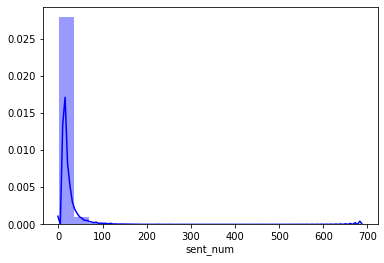

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

sns.distplot(df.sent_num, bins=20, color="blue")

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

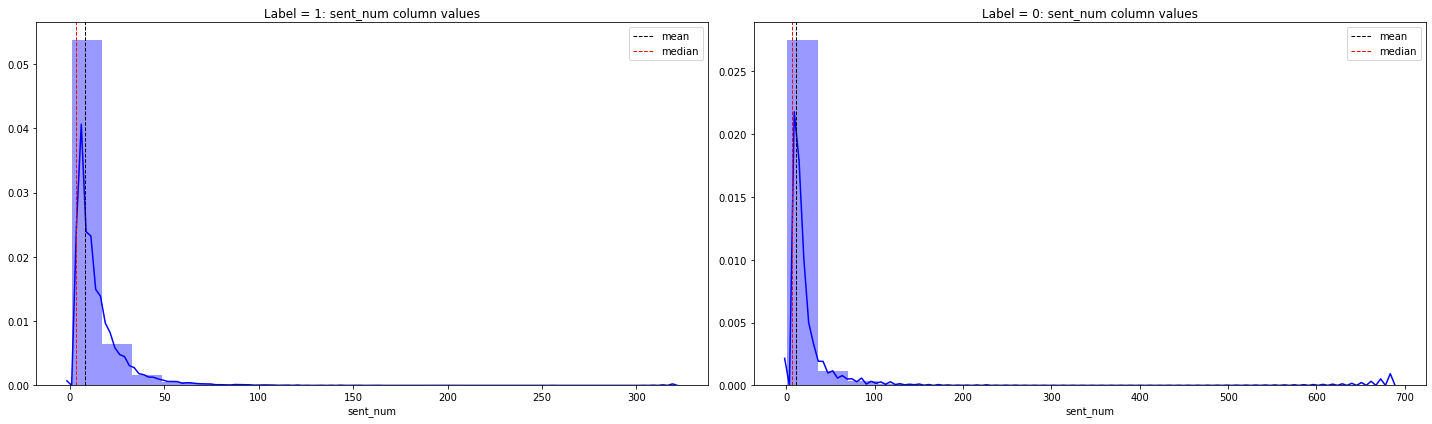

In [58]:
def plot_len_dist(df, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    for i, label in enumerate(list(df["label"].unique())):
        topic_subset = df[df["label"] == label][col_name]

        sns.distplot(topic_subset, bins=20, color="blue", ax=axes[i])
        axes[i].axvline(
            (topic_subset).mean(), color="k", linestyle="dashed", linewidth=1, label="mean"
        )
        axes[i].axvline(
            (topic_subset).median(), color="r", linestyle="dashed", linewidth=1, label="median"
        )
        axes[i].legend()
        axes[i].set(title="Label = %s: %s column values" % (label, col_name))
    
    fig.tight_layout()
    
plot_len_dist(df, "sent_num")

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [59]:
depth_df = pd.DataFrame(df, columns=["age", "sent_num"])
depth_df = depth_df[ (depth_df.age >= 16) & (depth_df.age <= 32) ]
depth_df

,age,sent_num
0,32.0,15
1,28.0,6
2,16.0,10
3,32.0,5
7,18.0,5
...,...,...
24514,18.0,22
24515,23.0,5
24516,23.0,7
24517,19.0,1


Нет, возраст автора в этих пределах почти никак не коррелирует с количеством предложений в тексте (corr ~ 0):

In [60]:
depth_df.corr()

,age,sent_num
age,1.000000,0.039831
sent_num,0.039831,1.000000


### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [61]:
def char_ngrams(text: str, n=2):
    result=[]
    count=0
    for token in text[:len(text) - n + 1]:  
        result.append(text[count:count + n])  
        count += 1 
    return result

In [62]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [63]:
def word_ngrams(text: str, n=2):
    text = list(get_tokens(text))
    result=[]
    count=0
    for token in text[:len(text) - n + 1]:  
        result.append(text[count:count + n])  
        count += 1 
    return result

In [64]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [65]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [66]:
def lemma_ngrams(text: str, n=2):
    text = text_to_lemm(text)
    result=[]
    count=0
    for token in text[:len(text) - n + 1]:  
        result.append(text[count:count + n])  
        count += 1 
    return result

In [67]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [68]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [69]:
def pos_ngrams(text: str, n=2):
    text = list(pos_tagging(text))
    result=[]
    count=0
    for token in text[:len(text) - n + 1]:  
        result.append(text[count:count + n])  
        count += 1 
    return result

In [70]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [71]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [72]:
def build_pos_dict(corpus):
    pos_d = dict()
    for doc in corpus:
        for pos in pos_tagging(doc):
            if pos in pos_d.keys():
                pos_d[pos] += 1
            else:
                pos_d[pos] = 1
    return pos_d

In [73]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'NOUN': 7, 'PRTF': 1, 'ADJF': 2, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [74]:
from tqdm import tqdm


def build_lemm_dict_topn(corpus: list, n=15):
    lemma_d = dict()
    
    for doc in tqdm(corpus):
        for lemma in text_to_lemm(doc):
            if lemma in lemma_d.keys():
                lemma_d[lemma] += 1
            else:
                lemma_d[lemma] = 1
    top_n = sorted([[k, v] for k, v in lemma_d.items()], key=lambda x: x[1])[-15:]
    return top_n

global_text_num = 1000
top_15_depres = build_lemm_dict_topn(list(df[df['label'] == 1].text[:global_text_num]))

top_15_not_depres = build_lemm_dict_topn(list(df[df['label'] == 0].text[:global_text_num]))

print("top 15 по каждому классу (1 или 0) исходя из 1000 текстов по каждому:\n")
print("Label = 1: " + str(top_15_depres))
print()
print("Label = 0: " + str(top_15_not_depres))
print()
print("Пересечение: " + str([i for i in top_15_depres for j in top_15_not_depres if i[1] == j[1]]))
print("Число пересекающихся лемм: " + str(len([i for i in top_15_depres for j in top_15_not_depres if i[1] == j[1]])))

100%|██████████| 1000/1000 [00:04<00:00, 209.78it/s]

top 15 по каждому классу (1 или 0) исходя из 1000 текстов по каждому:

Label = 1: [['работа', 357], ['делать', 358], ['день', 360], ['друг', 372], ['мама', 432], ['просто', 482], ['свой', 496], ['человек', 509], ['знать', 540], ['очень', 661], ['мочь', 727], ['жизнь', 752], ['хотеть', 816], ['жить', 848], ['год', 966]]

Label = 0: [['район', 356], ['ребёнок', 358], ['день', 362], ['компания', 366], ['апрель', 372], ['город', 412], ['также', 431], ['работа', 437], ['наш', 447], ['проект', 458], ['казахстан', 474], ['свой', 486], ['россия', 497], ['область', 510], ['год', 1467]]

Пересечение: [['делать', 358], ['друг', 372]]
Число пересекающихся лемм: 2


7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

Наличие определённых слов, отражающих тональность текста, например, с помощью инструмента "from nltk.sentiment.vader import SentimentIntensityAnalyzer", можно каждому слову поставить число в интервале [-1, 1], которое отражает степень его "негативности" (если ближе к -1) или "позитивности" (если ближе к 1). Также можно 1) выделить количество слов в текстах, которые являются маркерами депрессии (https://www.frontiersin.org/articles/10.3389/fpsyg.20..); 2) провести анализ тональности на материале эмодзи (https://github.com/sInceraSs/ELSA); 3) реализовать topic modelling - произвести суммаризацию с помощью LDA на материале текстов (from sklearn.decomposition import LatentDirichletAllocation (example https://github.com/kapadias/mediumposts/blob/master/n..)); 4) с помощью фреймворка Author2Vec (https://arxiv.org/pdf/2003.11627.pdf) получить эмбеддинги юзеров; 5) поработать с такими текстовыми признаками: n-граммы (длиной 1/2/3), метаданные n-грамм (общее количество 1-грамм для юзера); 6) произвести анализ с помощью словаря LIWC (Linguistic Inquiry and Word Count) - отсылка к самому себе, параметр "злость" и др.